# MNIST 데이터 분석 Baseline code

## 1. 패키지 불러오기

In [1]:
import os
os.chdir('C:\BigData\SooDa\ML1\Baseline_code')

import input_data
import numpy as np
import matplotlib.pylab as plt

## 2. MNIST 데이터 둘러보기

In [2]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)  # MNIST 데이터를 불러와서 저장

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


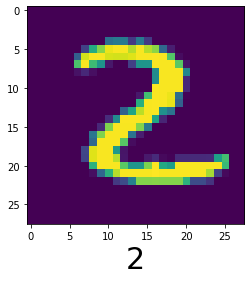

In [3]:
# 랜덤으로 25개 데이터를 뽑아서 저장, (X:이미지 , Y:정답라벨) 형태
pic,real_values = mnist_images.train.next_batch(25)   

index = 11 # 0~24 정수 입력해보기
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.xlabel(real_values[index], fontsize=30)
plt.show()

# 이미지(X)와 정답라벨(Y)가 출력됨

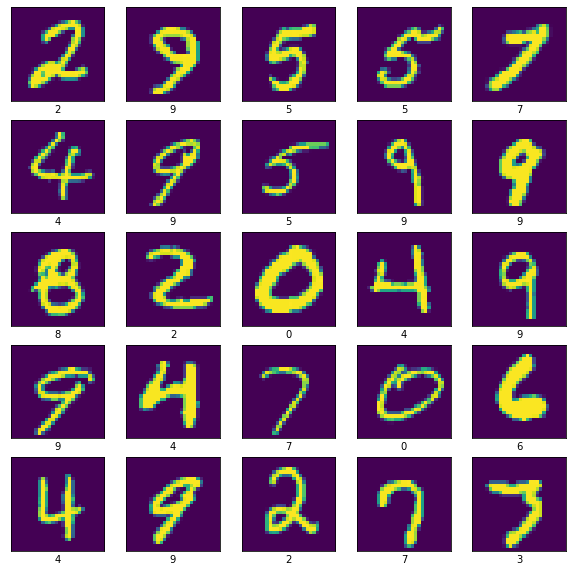

In [4]:
# 더 많이 둘러보기

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(pic[i,:] , [28,28])
    plt.imshow(image)
    plt.xlabel(real_values[i])
plt.show()

## 3. 데이터셋 만들기

In [5]:
# Download Data : http://yann.lecun.com/exdb/mnist/
# Data input script : https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# 데이터 개수 확인하기
print("the number of train examples :" , mnist.train.num_examples)
print("the number of test examples :" , mnist.test.num_examples)

the number of train examples : 55000
the number of test examples : 10000


In [7]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Epoch: 0001 cost= 2.788582774
None
Accuracy:  0.7655
Epoch: 0002 cost= 1.042648687
None
Accuracy:  0.8265
Epoch: 0003 cost= 0.839279663
None
Accuracy:  0.8474
Epoch: 0004 cost= 0.741051348
None
Accuracy:  0.8593
Epoch: 0005 cost= 0.678939898
None
Accuracy:  0.8678
Epoch: 0006 cost= 0.633954428
None
Accuracy:  0.872
Epoch: 0007 cost= 0.599383199
None
Accuracy:  0.8767
Epoch: 0008 cost= 0.572096822
None
Accuracy:  0.8805
Epoch: 0009 cost= 0.549189078
None
Accuracy:  0.8815
Epoch: 0010 cost= 0.529915846
None
Accuracy:  0.8839
Epoch: 0011 cost= nan
None
Accuracy:  0.098
Epoch: 0012 cost= nan
None
Accuracy:  0.098
Epoch: 0013 cost= nan
None
Accuracy:  0.098
Epoch: 0014 cost= nan
None
Accuracy:  0.098
Epoch: 0015 cost= nan
None
Accuracy:  0.098


In [11]:
#import matplotlib.pyplot as plt2
#import random

# Get one and predict
#r = random.randint(0, mnist.test.num_examples - 1)
#print("Label:", sess.run(tf.argmax(mnist.test.labels[r : r+1], 1)))
#print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
#                      feed_dict={X : mnist.test.images[r : r+1]})
      
#plt2.imshow(mnist.test.images[r : r+1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
#plt2.show()